# Multiple Linear Regression
## BoomBikes Case Study
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Essentially, the company wants —

To create a linear model that quantitatively relates which variables are significant in predicting the demand for shared bikes e.g. season, month of the year, temperature, etc.

To know how well those variables describe the bike demands.

So interpretation is important!

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Boombike dataset

In [148]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

 # Supress Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [149]:
# Read data to datframe
df_day_full=pd.read_csv("day.csv")
# Check the head of the dataset
df_day_full.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [150]:
df_day_full.shape

(730, 16)

In [151]:
df_day_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All the columns are not null so no missing values

In [152]:
df_day_full.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [153]:
df_day = df_day_full.drop(["instant","dteday","casual","registered"],axis=1)
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: EDA
Let's now spend some time doing what is arguably the most important step - understanding and exploring the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

## Univariate Analysis

In [154]:
num_cols=["temp","atemp","hum","windspeed"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday"]

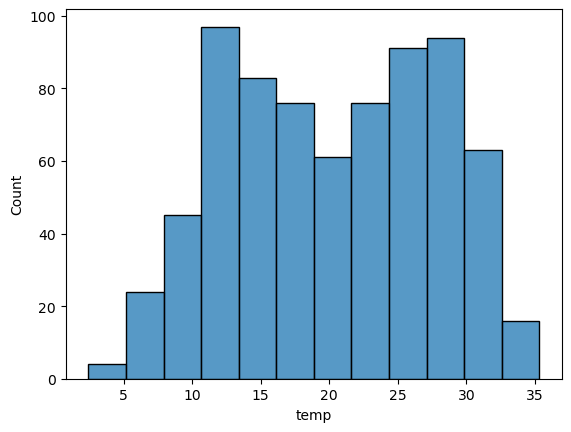

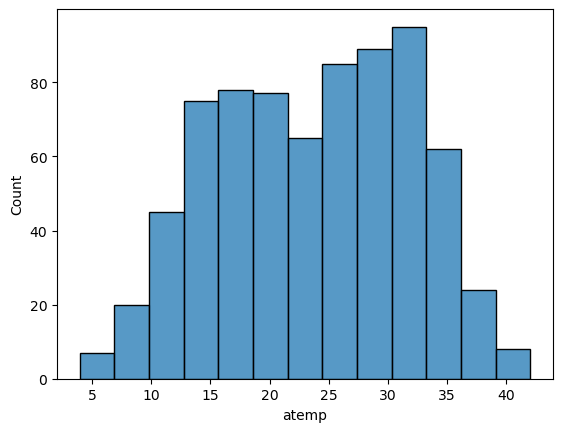

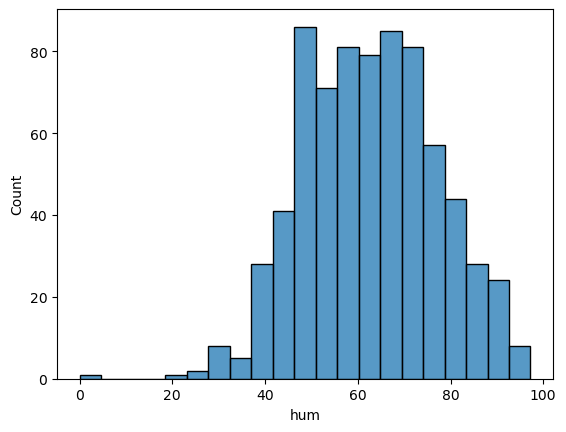

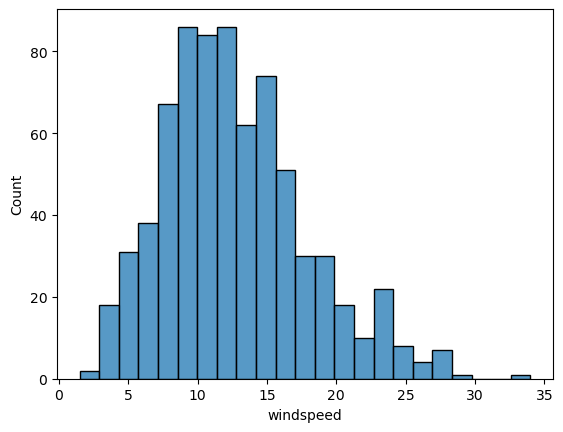

In [155]:
for i in num_cols:
    sns.histplot(x=df_day[i])
    plt.show()

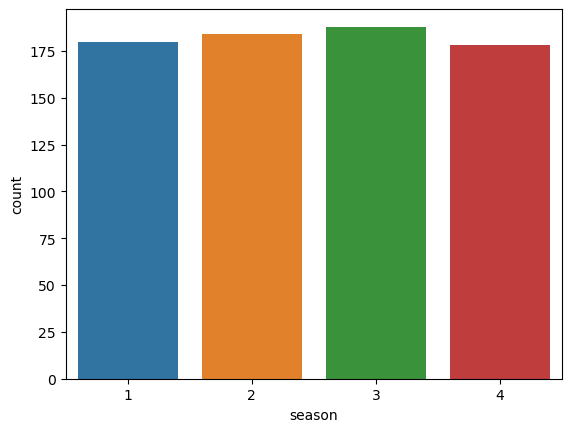

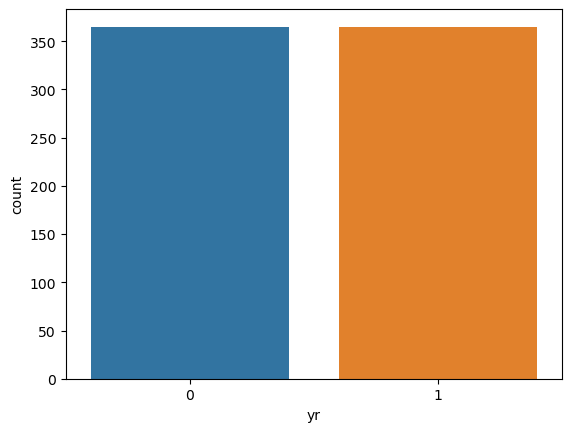

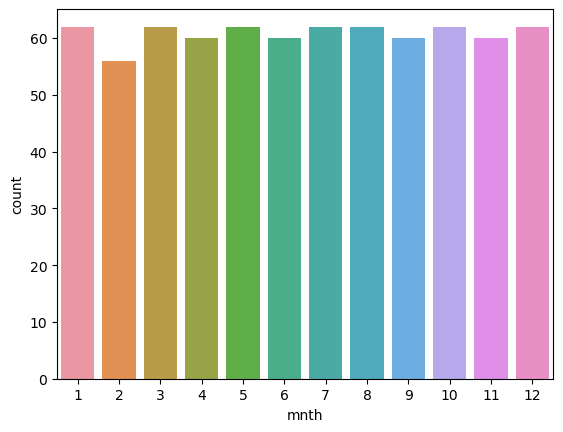

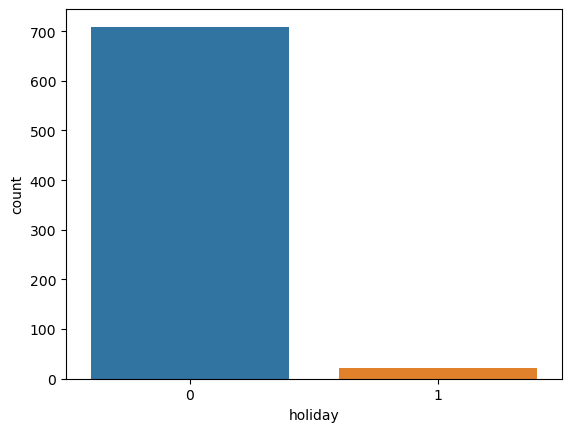

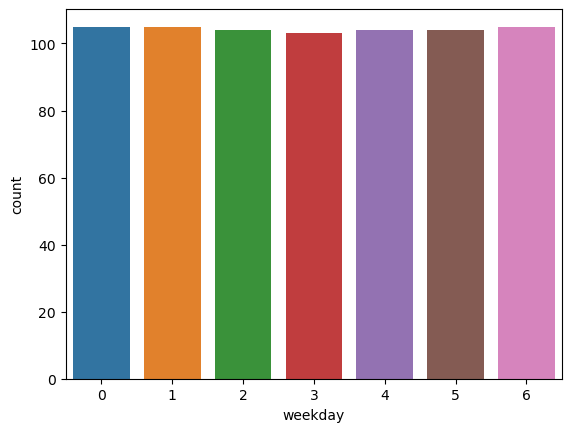

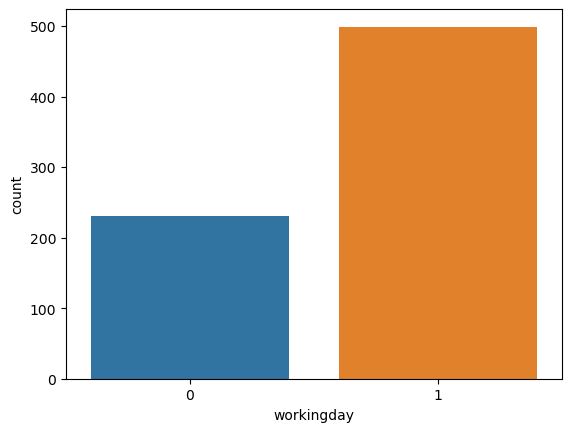

In [156]:
for i in cat_cols:
    sns.countplot(x=df_day[i])
    plt.show()

## Bivariate Analysis

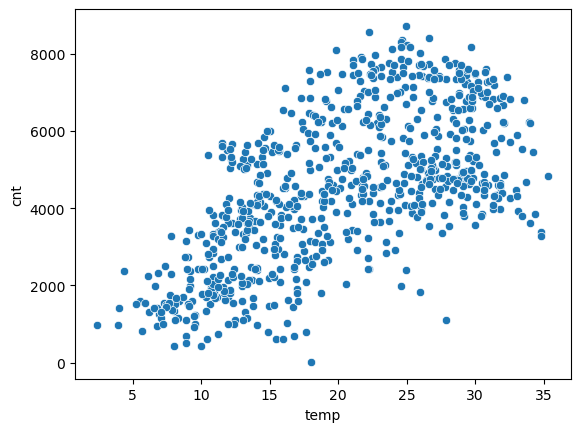

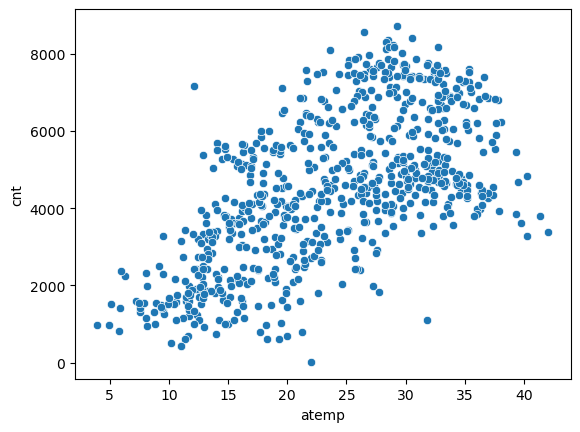

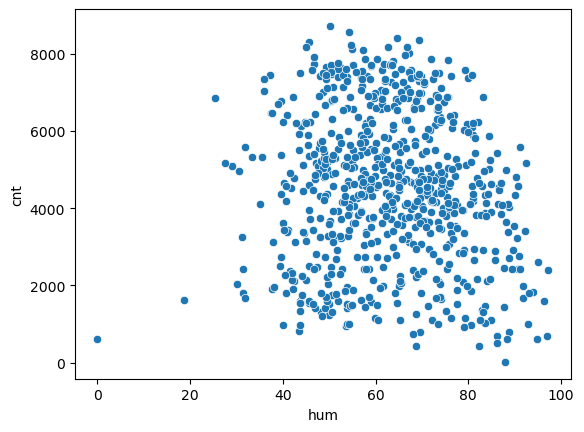

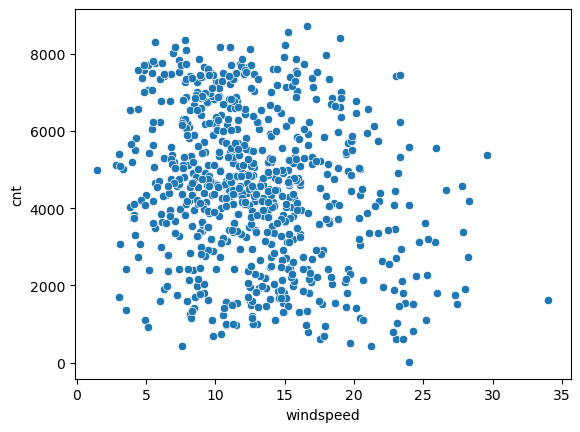

In [157]:
for i in num_cols:
    sns.scatterplot(x=df_day[i],y=df_day["cnt"])
    plt.show()

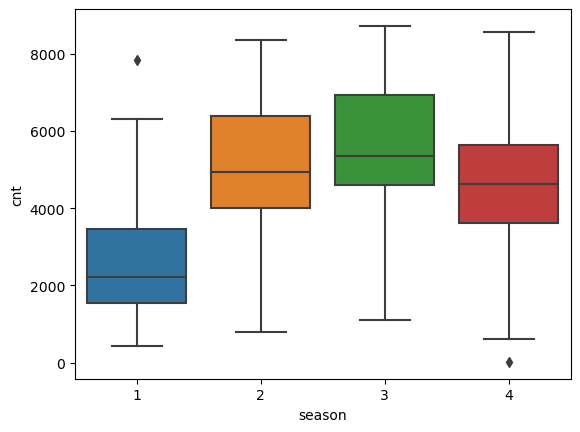

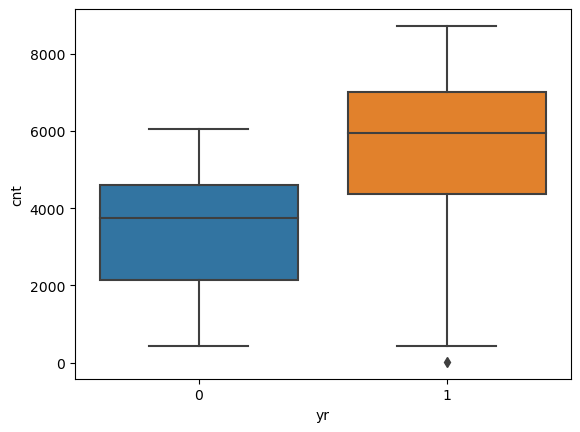

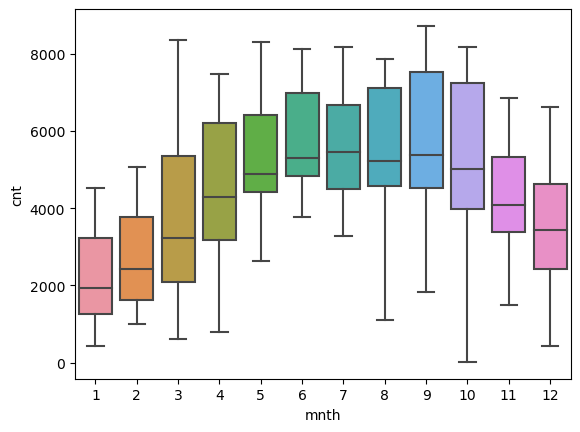

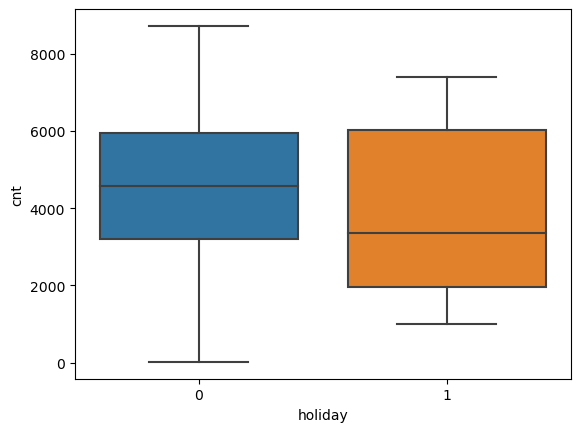

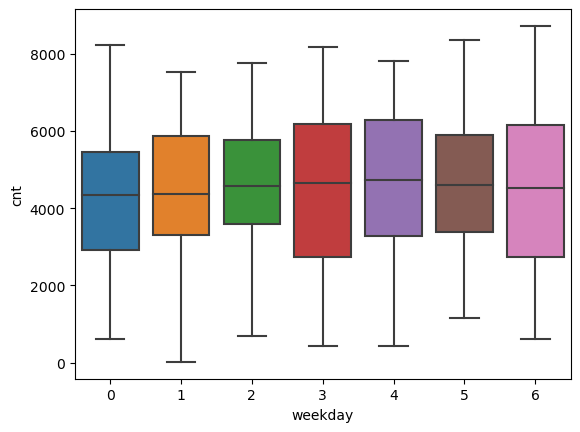

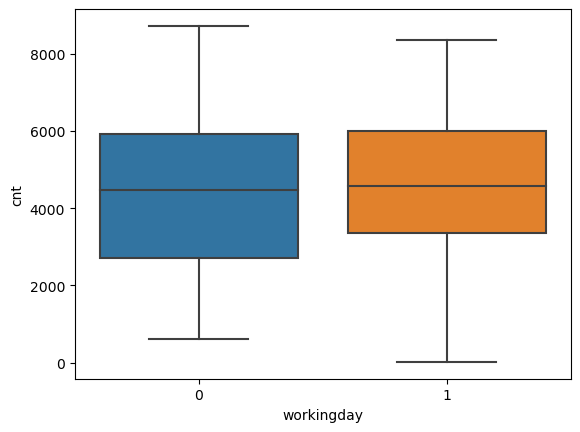

In [158]:
for i in cat_cols:
    sns.boxplot(x=df_day[i],y=df_day["cnt"])
    plt.show()

### Handling Outliers

In [159]:
for j in num_cols:
    outliers = []
    def detect_outliers_iqr(data):
        data = sorted(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        #print(q1, q3)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        # print(lwr_bound, upr_bound)
        for i in data: 
            if (i<lwr_bound or i>upr_bound):
                outliers.append(i)
            
        return outliers# Driver code
    data_outliers = detect_outliers_iqr(df_day[j])
    print("Outliers from IQR method: ", data_outliers)

    df_day = df_day[~df_day[j].isin(data_outliers)]

Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  [0.0, 18.7917]
Outliers from IQR method:  [25.833257, 25.917007, 26.000489, 26.666536, 27.292182, 27.417204, 27.7916, 27.833743, 27.999836, 28.250014, 28.292425, 29.584721]


In [160]:
df_day.shape

(716, 12)

## Step - 3: Pre-processing Steps - Data preparation

### Dummy Variable Creation (One Hot Encoding)

In [161]:
#a_df=np.unique(df_day[["season"]], axis=0)

di_season = {1: "spring", 2: "summer",3: "fall",4: "winter"}
df_season  = df_day.replace({"season": di_season})

di_weathersit = {1: "clear", 2: "mist",3: "light_snow",4: "heavy_rain"}
df_weathersit  = df_season.replace({"weathersit": di_weathersit})

di_yr = {0: 2018, 1:2019}
df_yr  = df_weathersit.replace({"yr": di_yr})

di_weekday={1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}
df_weekday  = df_yr.replace({"weekday": di_weekday})

di_mnth={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_day_comp  = df_weekday.replace({"mnth": di_mnth})



In [162]:
df_day_comp.shape

(716, 12)

In [163]:
dum_season=pd.get_dummies(df_day_comp["season"],drop_first=True,dtype=int)#dummies=n-1
df_dum_season=pd.concat([df_day_comp,dum_season],axis=1)


dum_yr=pd.get_dummies(df_dum_season["yr"],drop_first=True,dtype=int)#dummies=n-1
df_dum_yr=pd.concat([df_dum_season,dum_yr],axis=1)

dum_mnth=pd.get_dummies(df_dum_yr["mnth"],drop_first=True,dtype=int)#dummies=n-1
df_dum_mnth=pd.concat([df_dum_yr,dum_mnth],axis=1)



dum_weekday=pd.get_dummies(df_dum_mnth["weekday"],drop_first=True,dtype=int)#dummies=n-1
df_dum_weekday=pd.concat([df_dum_mnth,dum_weekday],axis=1)

dum_weathersit =pd.get_dummies(df_dum_weekday["weathersit"],drop_first=True,dtype=int)#dummies=n-1
df_dum_weathersit=pd.concat([df_dum_weekday,dum_weathersit],axis=1)

df_dum_weathersit

df_day_prep=df_dum_weathersit.drop(["yr","mnth","weekday","season","weathersit"],axis=1)
df_day_prep.shape


(716, 30)

In [164]:
df_day_prep.columns

Index([   'holiday', 'workingday',       'temp',      'atemp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
               2019,        'Aug',        'Dec',        'Feb',        'Jan',
              'Jul',        'Jun',        'Mar',        'May',        'Nov',
              'Oct',        'Sep',        'Mon',        'Sat',        'Sun',
             'Thur',        'Tue',        'Wed', 'light_snow',       'mist'],
      dtype='object')

### Train-Test Split

In [232]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_day_prep, train_size = 0.7, test_size = 0.3, random_state = 100)

In [166]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
541,0,1,25.864153,29.73520,37.3333,23.292014,7442,0,0,0,...,0,0,0,0,0,1,0,0,0,0
116,0,1,25.420000,28.75710,83.5417,20.917400,3872,0,1,0,...,0,0,0,0,0,0,0,0,0,1
718,0,1,13.530000,16.76085,66.7917,8.875021,4128,0,0,1,...,0,0,0,1,0,0,0,0,0,1
496,0,0,23.130847,27.24085,48.0417,8.249911,7429,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### Scaling for numerical columns

In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [168]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [169]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
728,0,0,0.252441,0.204242,0.293114,0.923102,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
541,0,1,0.733702,0.689995,0.126342,0.914353,0.853659,0,0,0,...,0,0,0,0,0,1,0,0,0,0
116,0,1,0.719799,0.663818,0.826912,0.814718,0.442936,0,1,0,...,0,0,0,0,0,0,0,0,0,1
718,0,1,0.347624,0.342763,0.572964,0.309436,0.472388,0,0,1,...,0,0,0,1,0,0,0,0,0,1
496,0,0,0.648145,0.623239,0.288693,0.283207,0.852163,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [170]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.031936,0.682635,0.555826,0.524299,0.519049,0.461956,0.519573,0.241517,0.241517,0.245509,...,0.077844,0.087824,0.141717,0.139721,0.143713,0.129741,0.143713,0.159681,0.023952,0.365269
std,0.176006,0.465916,0.235899,0.218363,0.210216,0.206848,0.226255,0.428431,0.428431,0.430819,...,0.268194,0.283322,0.349108,0.347043,0.351149,0.336354,0.351149,0.366676,0.153053,0.481987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343347,0.328399,0.363234,0.316427,0.358836,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558310,0.539587,0.520530,0.431828,0.522434,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.766857,0.707754,0.674036,0.585673,0.692706,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Heatmap to check correlation

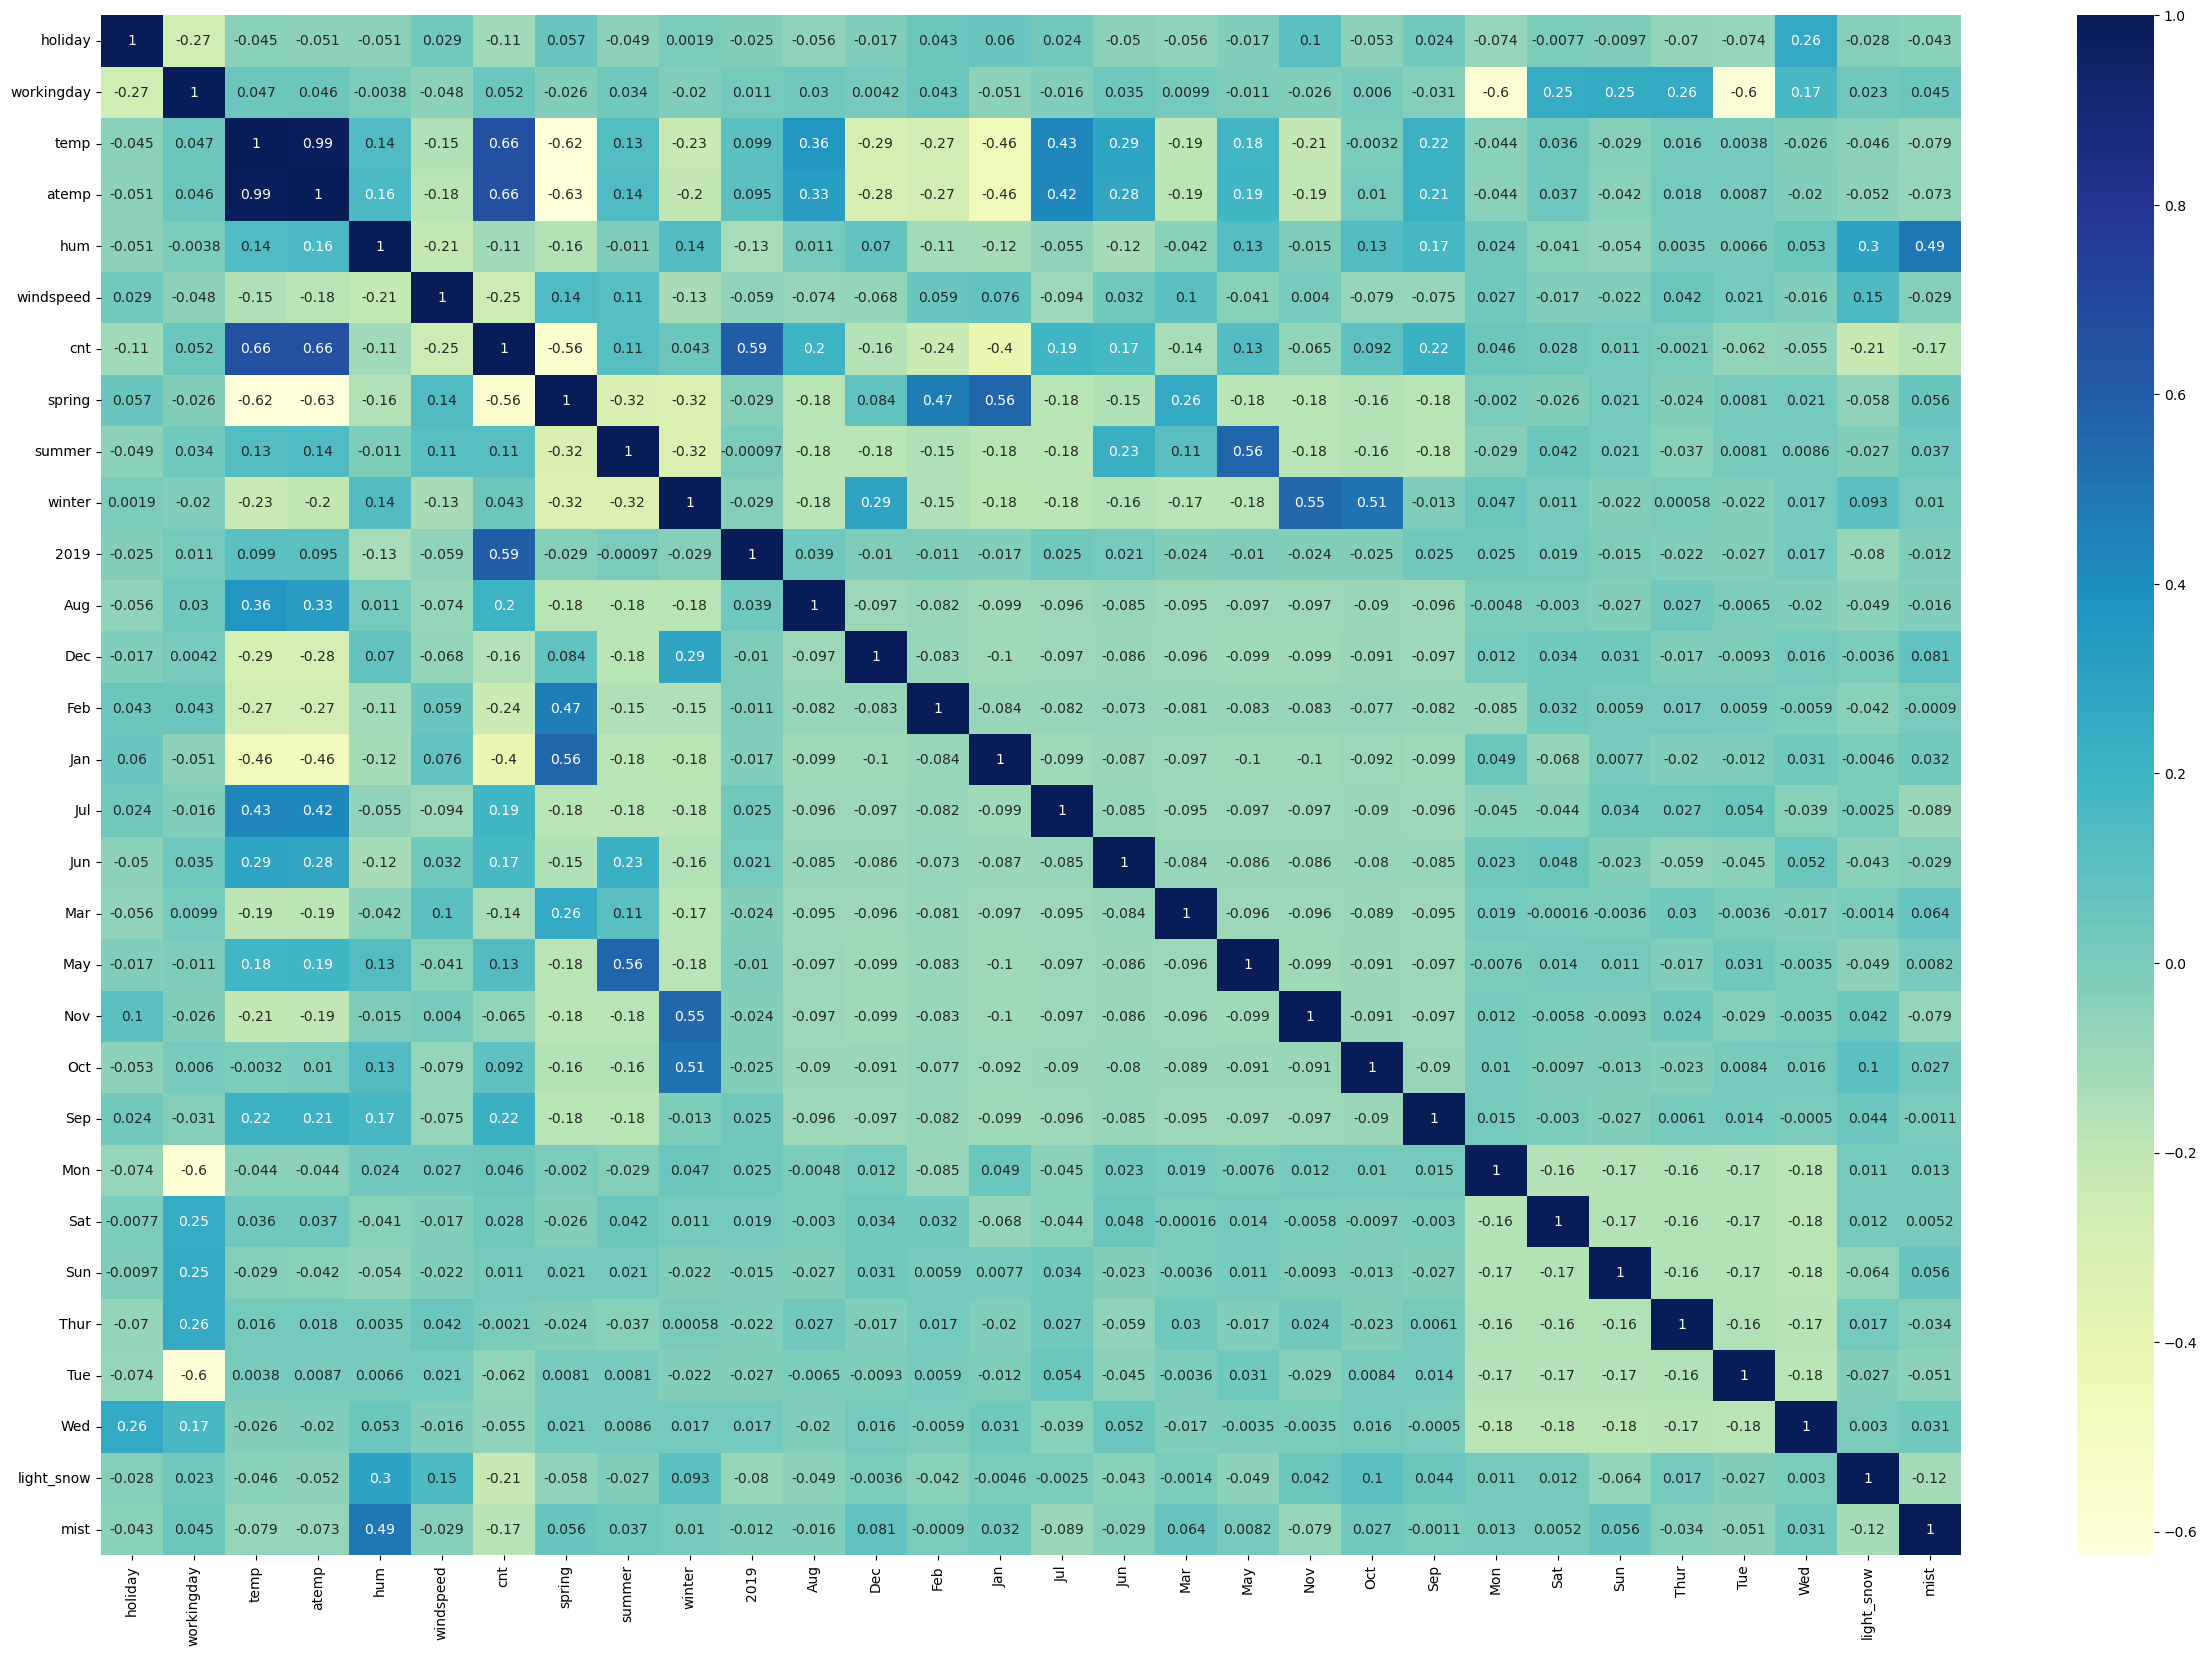

In [103]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [171]:
y_train = df_train.pop('cnt')
X_train = df_train

In [174]:
X_train.columns=X_train.columns.astype(str)
X_train.head()


,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
728,0,0,0.252441,0.204242,0.293114,0.923102,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
541,0,1,0.733702,0.689995,0.126342,0.914353,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
116,0,1,0.719799,0.663818,0.826912,0.814718,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
718,0,1,0.347624,0.342763,0.572964,0.309436,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
496,0,0,0.648145,0.623239,0.288693,0.283207,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Building a linear model (Backward method)

### Adding all the variables to the model

In [175]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     104.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.63e-183
Time:                        08:46:07   Log-Likelihood:                 529.38
No. Observations:                 501   AIC:                            -1001.
Df Residuals:                     472   BIC:                            -878.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.034      7.028      0.0

### Checking VIF

In [176]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,84.01
2,temp,67.64
3,atemp,56.96
25,Tue,17.88
21,Mon,17.02
6,spring,10.52
8,winter,8.70
7,summer,8.30
18,Nov,6.84
14,Jul,6.68


### Dropping the variable and updating the model

In [179]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('Aug', 1)
X.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue',
       'Wed', 'light_snow', 'mist'],
      dtype='object')

In [180]:
# Build a 2nd fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.35e-184
Time:                        08:47:33   Log-Likelihood:                 529.38
No. Observations:                 501   AIC:                            -1003.
Df Residuals:                     473   BIC:                            -884.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2383      0.030      7.888      0.0

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,66.75
2,temp,63.45
3,atemp,55.65
24,Tue,13.83
20,Mon,13.32
6,spring,8.64
8,winter,7.99
12,Jan,5.75
17,Nov,5.62
10,Dec,4.94


In [182]:
X = X.drop('Jun', 1,)
X.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2019', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed',
       'light_snow', 'mist'],
      dtype='object')

In [183]:
# Build a 3rd fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     113.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.05e-185
Time:                        08:47:56   Log-Likelihood:                 529.36
No. Observations:                 501   AIC:                            -1005.
Df Residuals:                     474   BIC:                            -890.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2391      0.030      8.023      0.0

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,65.17
2,temp,62.28
3,atemp,55.64
23,Tue,13.52
19,Mon,13.09
6,spring,8.44
8,winter,7.95
12,Jan,5.75
16,Nov,5.62
10,Dec,4.94


In [185]:
X = X.drop('Oct', 1,)
X.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2019', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar', 'May',
       'Nov', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'light_snow',
       'mist'],
      dtype='object')

In [186]:
# Build a 3rd fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     118.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.27e-186
Time:                        08:48:48   Log-Likelihood:                 529.22
No. Observations:                 501   AIC:                            -1006.
Df Residuals:                     475   BIC:                            -896.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2351      0.029      8.169      0.0

In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,61.00
1,workingday,60.89
3,atemp,55.37
22,Tue,12.71
18,Mon,12.41
6,spring,7.77
12,Jan,4.33
0,holiday,4.05
8,winter,3.82
7,summer,3.79


In [188]:
X = X.drop('Sun', 1,)
X.columns

# Build a 5th fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     123.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.09e-187
Time:                        08:49:55   Log-Likelihood:                 529.13
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     476   BIC:                            -902.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.028      8.314      0.0

In [189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,60.89
1,workingday,57.53
3,atemp,55.17
21,Tue,12.69
18,Mon,12.39
6,spring,7.77
12,Jan,4.32
0,holiday,3.88
8,winter,3.82
7,summer,3.79


In [190]:
X = X.drop('summer', 1,)
X.columns

# Build a 6th fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.28e-188
Time:                        08:50:30   Log-Likelihood:                 528.95
No. Observations:                 501   AIC:                            -1010.
Df Residuals:                     477   BIC:                            -908.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2458      0.024     10.241      0.0

In [191]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,55.56
3,atemp,53.55
1,workingday,40.53
20,Tue,9.19
17,Mon,9.12
6,spring,5.18
11,Jan,4.29
10,Feb,3.14
0,holiday,3.05
7,winter,2.52


In [192]:
X = X.drop('Feb', 1,)
X.columns

# Build a 6th fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.81e-189
Time:                        08:51:24   Log-Likelihood:                 528.51
No. Observations:                 501   AIC:                            -1011.
Df Residuals:                     478   BIC:                            -914.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.022     10.587      0.0

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,54.91
3,atemp,53.55
1,workingday,35.42
16,Mon,8.20
19,Tue,8.19
6,spring,3.08
0,holiday,2.78
7,winter,2.51
4,hum,2.15
10,Jan,1.97


In [194]:
X = X.drop('holiday', 1,)
X.columns

# Build a 8th fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.81e-189
Time:                        08:51:59   Log-Likelihood:                 528.51
No. Observations:                 501   AIC:                            -1011.
Df Residuals:                     478   BIC:                            -914.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.036      7.129      0.0

In [195]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,361.85
1,temp,357.52
0,workingday,14.77
3,hum,14.59
4,windspeed,6.23
15,Mon,4.20
18,Tue,4.19
5,spring,3.42
6,winter,3.13
21,mist,2.60


In [196]:
X = X.drop('Tue', 1,)
X.columns

# Build a 9th fitted model
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.41e-190
Time:                        08:52:34   Log-Likelihood:                 528.22
No. Observations:                 501   AIC:                            -1012.
Df Residuals:                     479   BIC:                            -919.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2721      0.029      9.465      0.0

In [197]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,357.25
2,atemp,355.63
3,hum,13.80
4,windspeed,5.45
0,workingday,5.35
5,spring,3.18
6,winter,2.97
20,mist,2.58
7,2019,2.10
9,Jan,2.01


In [198]:
X = X.drop('atemp', 1,)
X.columns

# Build a 10th fitted model
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.12e-190
Time:                        08:52:53   Log-Likelihood:                 527.56
No. Observations:                 501   AIC:                            -1013.
Df Residuals:                     480   BIC:                            -924.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2760      0.029      9.671      0.0

In [199]:
X = X.drop('Thur', 1,)
X.columns

# Build a 11th fitted model
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.18e-191
Time:                        08:53:09   Log-Likelihood:                 526.62
No. Observations:                 501   AIC:                            -1013.
Df Residuals:                     481   BIC:                            -928.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.029      9.697      0.0

In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,14.10
2,hum,13.58
3,windspeed,5.32
0,workingday,4.82
4,spring,3.16
5,winter,2.92
18,mist,2.57
6,2019,2.10
8,Jan,2.01
12,Nov,1.91


In [201]:
X = X.drop('Sat', 1,)
X.columns

# Build a 11th fitted model
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.76e-192
Time:                        08:53:41   Log-Likelihood:                 525.16
No. Observations:                 501   AIC:                            -1012.
Df Residuals:                     482   BIC:                            -932.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2761      0.029      9.653      0.0

In [204]:
X = X.drop('Mar', 1,)

# Build a 12th fitted model
X_train_lm = sm.add_constant(X)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.33e-192
Time:                        08:56:21   Log-Likelihood:                 523.20
No. Observations:                 501   AIC:                            -1010.
Df Residuals:                     483   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2869      0.028     10.195      0.0

In [205]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,13.80
2,hum,13.36
3,windspeed,5.23
0,workingday,4.56
4,spring,2.93
5,winter,2.92
16,mist,2.57
6,2019,2.10
11,Nov,1.89
13,Mon,1.77


In [212]:
X1 = X.drop('hum', 1,)

# Build a 15th fitted model
X_train_lm = sm.add_constant(X1)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.20e-188
Time:                        09:00:20   Log-Likelihood:                 511.95
No. Observations:                 501   AIC:                            -989.9
Df Residuals:                     484   BIC:                            -918.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2424      0.027      8.951      0.0

In [213]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,8.31
2,windspeed,5.16
0,workingday,4.55
4,winter,2.69
3,spring,2.58
5,2019,2.05
10,Nov,1.87
12,Mon,1.76
7,Jan,1.74
15,mist,1.62


In [214]:
X1 = X1.drop('May', 1,)

# Build a 15th fitted model
X_train_lm = sm.add_constant(X1)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.50e-189
Time:                        09:01:16   Log-Likelihood:                 510.85
No. Observations:                 501   AIC:                            -989.7
Df Residuals:                     485   BIC:                            -922.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2486      0.027      9.281      0.0

In [215]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,7.73
2,windspeed,5.16
0,workingday,4.55
4,winter,2.61
3,spring,2.52
5,2019,2.05
9,Nov,1.87
11,Mon,1.76
7,Jan,1.74
14,mist,1.61


## Step 5: Residual Analysis of the train data

In [216]:
y_train_cnt = lr_16.predict(X_train_lm)

Text(0.5, 0, 'Errors')

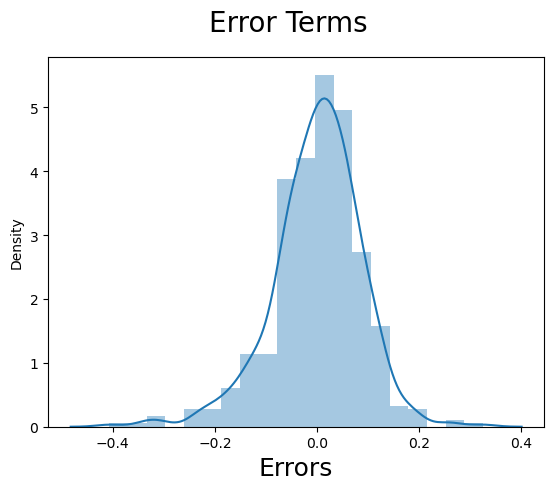

In [218]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making Predictions Using the Final Model

### Applying the scaling on the test sets

In [233]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [237]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.023256,0.688372,0.578678,0.549037,0.513819,0.458021,0.518992,0.232558,0.279070,0.246512,...,0.097674,0.074419,0.144186,0.144186,0.144186,0.176744,0.144186,0.102326,0.037209,0.279070
std,0.151067,0.464240,0.234997,0.217958,0.213246,0.190473,0.213323,0.423449,0.449589,0.431986,...,0.297567,0.263063,0.352098,0.352098,0.352098,0.382342,0.352098,0.303783,0.189716,0.449589
min,0.000000,0.000000,0.047987,0.026455,-0.054327,0.055979,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.379174,0.372748,0.345230,0.308596,0.374655,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.605366,0.586903,0.503474,0.447571,0.525081,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.771134,0.719142,0.666456,0.576917,0.671767,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.029946,1.019437,1.034745,0.914328,0.951680,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [230]:
y_test = df_test.pop('cnt')
X_test = df_test

Index(['workingday', 'temp', 'windspeed', 'spring', 'winter', '2019', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep', 'Mon', 'Wed', 'light_snow', 'mist'],
      dtype='object')

In [236]:
X_test.columns=X_test.columns.astype(str)
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue',
       'Wed', 'light_snow', 'mist'],
      dtype='object')

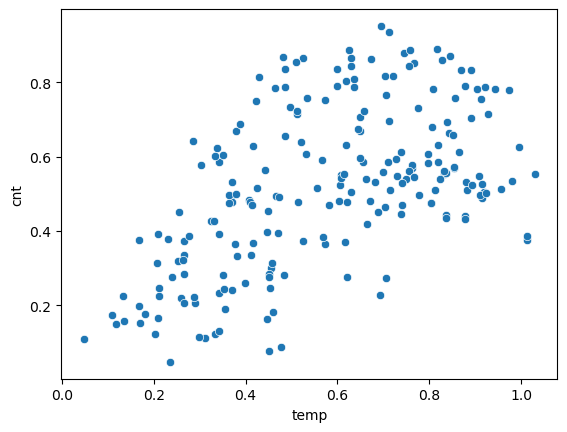

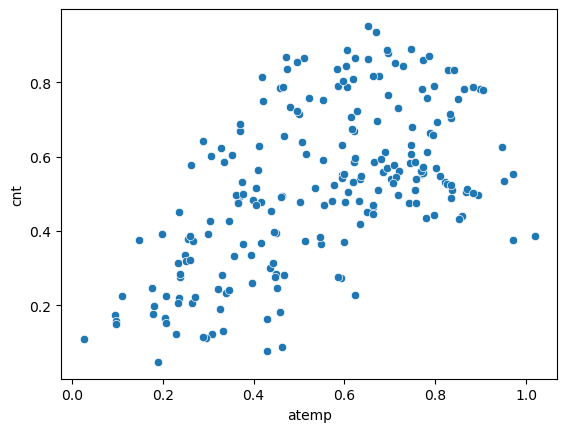

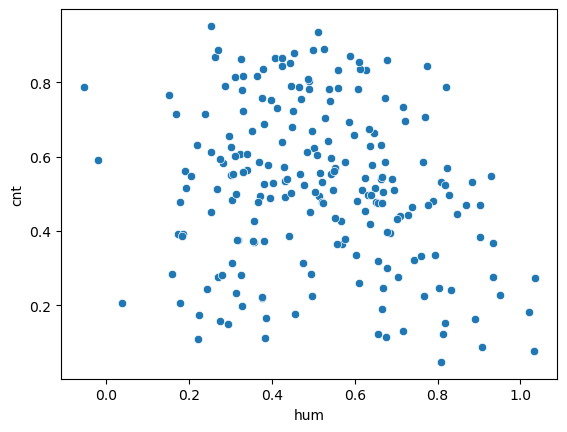

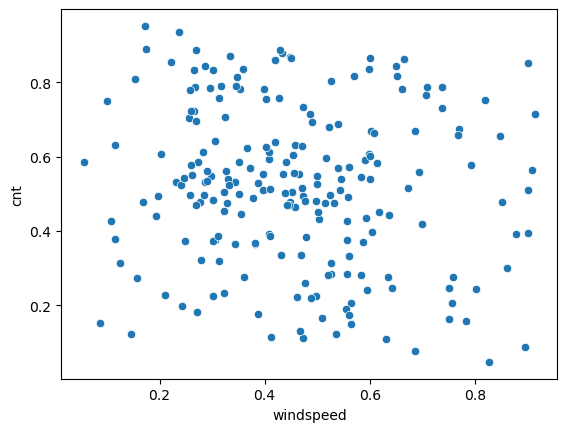

In [238]:
for i in num_cols:
    sns.scatterplot(x=df_test[i],y=df_test["cnt"])
    plt.show()

In [239]:
for j in num_cols:
    outliers = []
    def detect_outliers_iqr(data):
        data = sorted(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        #print(q1, q3)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        # print(lwr_bound, upr_bound)
        for i in data: 
            if (i<lwr_bound or i>upr_bound):
                outliers.append(i)
            
        return outliers# Driver code
    data_outliers = detect_outliers_iqr(df_test[j])
    print("Outliers from IQR method: ", data_outliers)

    #df_day = df_day[~df_day[j].isin(data_outliers)]

Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  []


In [224]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     65.96
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.21e-68
Time:                        09:08:50   Log-Likelihood:                 219.71
No. Observations:                 215   AIC:                            -407.4
Df Residuals:                     199   BIC:                            -353.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2908      0.044      6.613      0.0

## Step 7: Model Evaluation 

In [225]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

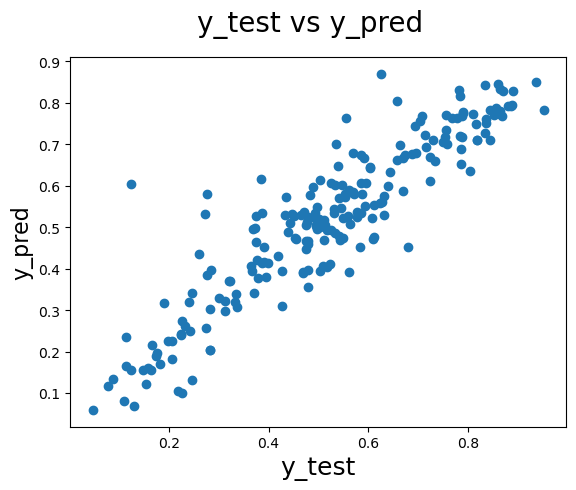

In [226]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

demand = 0.2908+0.0612*workingday+0.3058*temp-0.0573*windspeed-0.1646*spring+0.0571*winter+0.2366*2019-0.0830*Dec-0.1094*Jul-0.0228*Jan-0.0567*Nov+0.0286*Sep+0.0540*Mon-0.0118*Wed-0.3064*light_snow-0.1122*mist

# Doing RFE method to build model

In [246]:
# Running RFE with the output number of the variable equal to 18
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator=LinearRegression()
rfe=RFE(estimator,n_features_to_select=18)

rfe=rfe.fit(X_train,y_train)

In [268]:
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,mist
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.031936,0.682635,0.555826,0.524299,0.519049,0.461956,0.241517,0.241517,0.245509,0.504990,...,0.077844,0.087824,0.141717,0.139721,0.143713,0.129741,0.143713,0.159681,0.023952,0.365269
std,0.176006,0.465916,0.235899,0.218363,0.210216,0.206848,0.428431,0.428431,0.430819,0.500475,...,0.268194,0.283322,0.349108,0.347043,0.351149,0.336354,0.351149,0.366676,0.153053,0.481987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343347,0.328399,0.363234,0.316427,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558310,0.539587,0.520530,0.431828,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.766857,0.707754,0.674036,0.585673,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 3),
 ('Jun', False, 10),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 4),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 6),
 ('Sun', False, 11),
 ('Thur', False, 7),
 ('Tue', False, 2),
 ('Wed', False, 5),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [248]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', '2019', 'Dec', 'Feb', 'Jan', 'May', 'Nov', 'Sep', 'Mon',
       'light_snow', 'mist'],
      dtype='object')

In [249]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.74e-191
Time:                        09:24:01   Log-Likelihood:                 522.93
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     482   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.029     10.428      0.0

In [250]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.73
3,temp,53.97
4,atemp,53.11
7,spring,3.96
8,winter,2.47
12,Jan,2.37
5,hum,2.11
11,Feb,1.91
2,workingday,1.85
14,Nov,1.84


In [251]:

X_train_rfe = X_train_rfe.drop('atemp', 1,)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     171.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.03e-192
Time:                        09:27:59   Log-Likelihood:                 522.58
No. Observations:                 501   AIC:                            -1009.
Df Residuals:                     483   BIC:                            -933.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.029     10.632      0.0

In [252]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.77
6,spring,3.96
3,temp,3.18
7,winter,2.46
11,Jan,2.36
4,hum,2.10
10,Feb,1.91
2,workingday,1.85
13,Nov,1.84
15,Mon,1.72


In [253]:
X_train_rfe = X_train_rfe.drop('holiday', 1,)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     180.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.34e-192
Time:                        09:29:10   Log-Likelihood:                 520.84
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     484   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2986      0.029     10.459      0.0

In [255]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.90
5,spring,3.96
2,temp,3.17
6,winter,2.46
10,Jan,2.35
3,hum,2.10
9,Feb,1.90
12,Nov,1.81
16,mist,1.65
8,Dec,1.64


## Residual analysis of RFE model

In [256]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

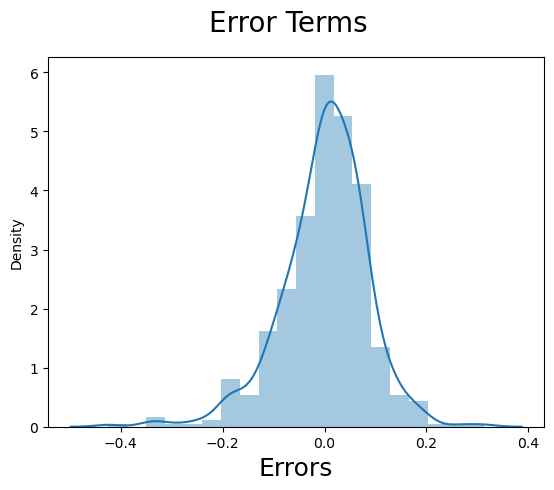

In [258]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [259]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [260]:
y_test = df_test.pop('cnt')
X_test = df_test


In [262]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_test.columns=X_test.columns.astype(str)
X_train_new.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter', '2019',
       'Dec', 'Feb', 'Jan', 'May', 'Nov', 'Sep', 'Mon', 'light_snow', 'mist'],
      dtype='object')

In [263]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     57.78
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.60e-65
Time:                        09:37:25   Log-Likelihood:                 2164.2
No. Observations:                 215   AIC:                            -4294.
Df Residuals:                     198   BIC:                            -4237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.000    -18.386      0.0

In [264]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_test_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42300.07
5,spring,4.12
2,temp,3.52
6,winter,2.43
3,hum,2.38
9,Feb,2.34
10,Jan,2.16
16,mist,1.90
14,Mon,1.72
1,workingday,1.66


In [274]:
y_train_cnt = lm.predict(X_test_new)

Text(0.5, 0, 'Errors')

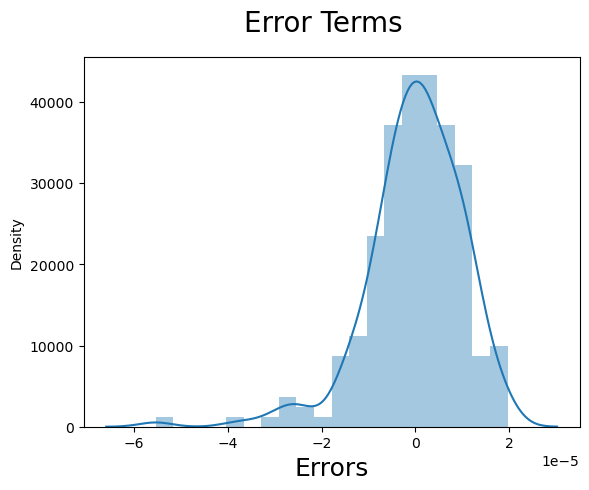

In [275]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Model prediction for RFE model

In [266]:
# Making predictions
y_pred = lm.predict(X_test_new)


Text(0, 0.5, 'y_pred')

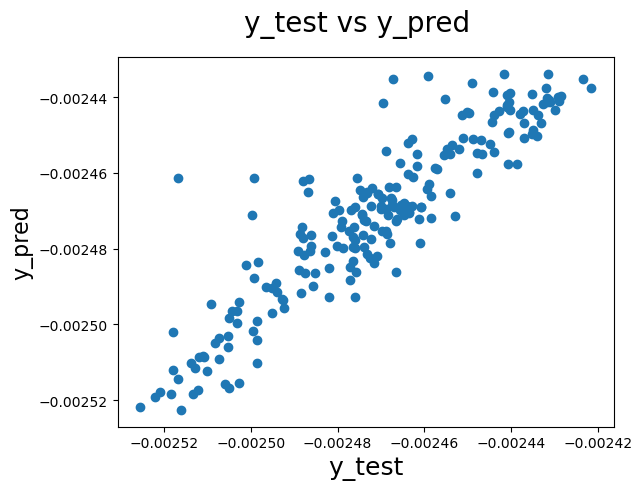

In [267]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:
demand = 0.2986+0.0441*workingday+0.3876*temp-0.1278*hum-0.1178*windspeed-0.0761*spring+0.0961*winter+0.2300*2019-0.0699*Dec-0.0450*Feb-0.0859*Jan+0.0420*May-0.0842*Nov+0.0740*Sep+0.0698*Mon-0.2087*light_snow-0.0431*mist


# FINAL SELECTION

Since the Rsquare and Adjusted Rsquare value of Backward method for MLP is better than RFE selection method so we will go with Backward method model

Final Prediction:
We can see that the equation of our best fitted line is:
demand = 0.2908+0.0612*workingday+0.3058*temp-0.0573*windspeed-0.1646*spring+0.0571*winter+0.2366*2019-0.0830*Dec-0.1094*Jul-0.0228*Jan
-0.0567*Nov+0.0286*Sep+0.0540*Mon-0.0118*Wed-0.3064*light_snow-0.1122*mist

Overall we have a decent model, but we also acknowledge that we could do better.